In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string

import io
from google.colab import files

In [ ]:
# Import the packages and print their versions
import tensorflow as tf
import keras
import scikeras

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")
print(f"SciKeras version: {scikeras.__version__}")


TensorFlow version: 2.15.0
Keras version: 2.15.0
SciKeras version: 0.11.0


In [ ]:
#!pip install tensorflow==2.15.0 keras==2.15.0 scikeras==0.11.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

# Upload data set

In [ ]:
# Check if data is already uploaded, if so, no need to run this cell or the next cell
# skip to the cell that loads data into panda data frame
# this cell just loads the file into the folders on the left hand side
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
#upload the test data
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
# upload data into panda dataframes
train_raw_df = pd.read_csv('train.csv')
test_raw_df = pd.read_csv('test.csv')

In [ ]:
#lets check if the data was uploaded properply
train_raw_df

,Unnamed: 0,reviewText,Positive
0,5894,I really like this program. Gives you the abi...,1
1,3728,Works great on droid x. Different but lots of ...,1
2,8958,"I really liked this app...really do! but, I do...",1
3,7671,this app is sooo cool. I love how it drives my...,1
4,5999,Love this app. Use it from making shopping li...,1
...,...,...,...
15995,11284,this is the best game ever!but some jokes are ...,1
15996,11964,There is no issues with the app it is the best...,1
15997,5390,"Being an Xbox owner, this app fit my needs imm...",1
15998,860,Grandson loves this app. He plays all the ang...,1


In [ ]:
test_raw_df.columns

Index(['Unnamed: 0', 'reviewText', 'Positive'], dtype='object')

In [ ]:
test_raw_df

,Unnamed: 0,reviewText,Positive
0,10650,"this app is great, especially when i get stuck...",1
1,2041,Doesn't work that great on my Kindle fire. Wha...,0
2,8668,Was a bit hard to find out how to search. But ...,1
3,1114,This ap is easy to use and I use it often when...,1
4,13902,You can enjoy the thrill of slots and a coin g...,1
...,...,...,...
3995,4073,I don't bother reviewing an app unless it is r...,0
3996,7442,"I have a king James Bible, But this is a lot ...",1
3997,9999,Euchre is one of my favorite games and when I ...,1
3998,1870,According to some reviewers I don't know how t...,1


In [ ]:
test_raw_df.columns

Index(['Unnamed: 0', 'reviewText', 'Positive'], dtype='object')

# Data Preprocessing

In [ ]:
# turn the Amazon review text column all into lower case
train_raw_df['reviewText'] = train_raw_df['reviewText'].str.lower()
test_raw_df['reviewText'] = test_raw_df['reviewText'].str.lower()

In [ ]:
# check top 5 rows of each dataframe to see if they are lower case
train_raw_df.head()

,Unnamed: 0,reviewText,Positive
0,5894,i really like this program. gives you the abi...,1
1,3728,works great on droid x. different but lots of ...,1
2,8958,"i really liked this app...really do! but, i do...",1
3,7671,this app is sooo cool. i love how it drives my...,1
4,5999,love this app. use it from making shopping li...,1


In [ ]:
test_raw_df.head()

,Unnamed: 0,reviewText,Positive
0,10650,"this app is great, especially when i get stuck...",1
1,2041,doesn't work that great on my kindle fire. wha...,0
2,8668,was a bit hard to find out how to search. but ...,1
3,1114,this ap is easy to use and i use it often when...,1
4,13902,you can enjoy the thrill of slots and a coin g...,1


In [ ]:
# let's see what punctuation marks we can remove
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# let's make the python function that we can use to remove punctuation marks from the review text column
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))



In [ ]:
# let's use our python function remove punctuation marks on our reviewText column
train_raw_df['reviewText'] = train_raw_df['reviewText'].apply(remove_punctuation)
test_raw_df['reviewText'] = test_raw_df['reviewText'].apply(remove_punctuation)


In [ ]:
# let's check the if the punctuation marks are removed for the train data set
train_raw_df.head()

,Unnamed: 0,reviewText,Positive
0,5894,i really like this program gives you the abil...,1
1,3728,works great on droid x different but lots of f...,1
2,8958,i really liked this appreally do but i downloa...,1
3,7671,this app is sooo cool i love how it drives my ...,1
4,5999,love this app use it from making shopping lis...,1


In [ ]:
# let's check the if the punctuation marks are removed for the test data set
test_raw_df.head()

,Unnamed: 0,reviewText,Positive
0,10650,this app is great especially when i get stuck ...,1
1,2041,doesnt work that great on my kindle fire what ...,0
2,8668,was a bit hard to find out how to search but o...,1
3,1114,this ap is easy to use and i use it often when...,1
4,13902,you can enjoy the thrill of slots and a coin g...,1


In [ ]:
# let's import the nltk python library and import the stopwords module from it and look at the stopwords that we can remove


In [ ]:
#Stopwords remval:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
# put the stopwords into a set
STOPWORDS = set(stopwords.words('english'))

# define a function that will remove the stop words from our text
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [ ]:
# let's use our python function remove stopwords on our reviewText column
train_raw_df['reviewText'] = train_raw_df['reviewText'].apply(remove_stopwords)
test_raw_df['reviewText'] = test_raw_df['reviewText'].apply(remove_stopwords)

In [ ]:
# let's check the if the stopwords are removed for the train data set
train_raw_df.head()

,Unnamed: 0,reviewText,Positive
0,5894,really like program gives ability use email pr...,1
1,3728,works great droid x different lots fun previou...,1
2,8958,really liked appreally downloaded app another ...,1
3,7671,app sooo cool love drives dogs crazy think u g...,1
4,5999,love app use making shopping list keep track f...,1


In [ ]:
# let's check the if the stopwords are removed for the test data set
test_raw_df.head()

,Unnamed: 0,reviewText,Positive
0,10650,app great especially get stuck vowels one lett...,1
1,2041,doesnt work great kindle fire bummer young kid...,0
2,8668,bit hard find search find search button hides ...,1
3,1114,ap easy use use often making reservations espe...,1
4,13902,enjoy thrill slots coin game time graphics exc...,1


In [ ]:
# download and import lemmatization libraries
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# use lemmatizer and create dictionary for ntlk.pos_tags and WordNet's part of speech tags
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

In [ ]:
# create function for lemmatization
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [ ]:
# apply lemmatization function to the reviewText column of both train and test dataset
train_raw_df['reviewText'] = train_raw_df['reviewText'].apply(lemmatize_words)
test_raw_df['reviewText'] = test_raw_df['reviewText'].apply(lemmatize_words)


In [ ]:
# check head of train dataset
train_raw_df.head()

,Unnamed: 0,reviewText,Positive
0,5894,really like program give ability use email pro...,1
1,3728,work great droid x different lot fun previous ...,1
2,8958,really like appreally download app another tim...,1
3,7671,app sooo cool love drive dog crazy think u get...,1
4,5999,love app use make shop list keep track family ...,1


In [ ]:
# check head of test dataset
test_raw_df.head()

,Unnamed: 0,reviewText,Positive
0,10650,app great especially get stuck vowel one lette...,1
1,2041,doesnt work great kindle fire bummer young kid...,0
2,8668,bit hard find search find search button hide well,1
3,1114,ap easy use use often make reservation especia...,1
4,13902,enjoy thrill slot coin game time graphic excit...,1


# Feature Extraction


### Bag of Words

In [ ]:
# to get TD-IDF scores, we need the TF IDF vectorizer
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
# import
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# create a bag of words matrix for train dataset
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')
X_train_counts = vectorizer.fit_transform(train_raw_df['reviewText'])


In [ ]:
X_train_counts

<16000x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 188007 stored elements in Compressed Sparse Row format>

In [ ]:
# load matrix into a dataframe and check it out
X_train_counts_df = pd.DataFrame(X_train_counts.toarray(), columns=vectorizer.get_feature_names_out())
X_train_counts_df.head(5)


,099,10,100,1000,10000,101,11,12,13,14,...,youve,yr,yukon,zappos,zedge,zero,zodiac,zombie,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# calculate number of rows X_train_counts_df using .shape
X_train_counts_df.shape

(16000, 3000)

In [ ]:
# do the same for test dataset and check it out
X_test_counts = vectorizer.transform(test_raw_df['reviewText'])
X_test_counts_df = pd.DataFrame(X_test_counts.toarray(), columns=vectorizer.get_feature_names_out())
X_test_counts_df.head(5)


,099,10,100,1000,10000,101,11,12,13,14,...,youve,yr,yukon,zappos,zedge,zero,zodiac,zombie,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# calculate number of rows X_test_counts_df using .shape
X_test_counts_df.shape

(4000, 3000)

### Word2Vec

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import gensim library for word2vec
import gensim


In [ ]:
# get the pretrained word2vec google model
model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
# get the vocabulary of the documents from the vectorizer in train dataset
vocabulary = vectorizer.get_feature_names_out()
vocabulary

array(['099', '10', '100', ..., 'zombie', 'zone', 'zoom'], dtype=object)

In [ ]:
# create an empty list to store the document vectors
document_vectors = []

# lets go through each document in the TF-IDF matrix
for document_index in range(X_train_counts.shape[0]):

    # get the indices from the X_train_counts TF-IDF matrix
    indices = X_train_counts[document_index].indices

    # get the TF-IDF scores for the current document
    tfidf_scores = X_train_counts[document_index].data

    # make numpy array filled with zeroes for the document vector of this current document
    # we use 300 zeroes because the dimension of the google array is 300
    document_vector = np.zeros(300)

    # pair up the index with the corresponding tf-idf score and go through each word
    for index, tfidf_score in zip(indices, tfidf_scores):
      # get the word from the vocabulary
      word = vocabulary[index]

      # check if the word is in the Google word2vec model
      if word in model:
            # get the word vector
            word_vector = model[word]
            # multiply the tf-idf score with the word vector and add it to the document vector
            document_vector += tfidf_score * word_vector

    # append the document vector to the list
    document_vectors.append(document_vector)



In [ ]:
# let's look at the first three document vectors
for i in range(3):
    print(f"Document {i+1} vector: {document_vectors[i]}")


Document 1 vector: [ 0.12505832  0.08884593  0.03761046  0.31735616  0.09135376  0.23831328
  0.17528921  0.10077873 -0.03688668 -0.03201672 -0.08022892 -0.30484642
  0.00352142 -0.14223803 -0.29261081  0.32686672  0.2277494   0.19906846
  0.06072301 -0.25768515  0.17430402  0.15928715  0.11478865  0.0813333
 -0.12349886 -0.11312459 -0.18265618  0.28468549 -0.08710086 -0.07858597
 -0.17447816 -0.18115022 -0.06789735 -0.3070364   0.33608595 -0.07469896
  0.24121382 -0.06640961  0.36630657  0.09178092  0.06912776 -0.09903087
  0.39290861  0.22477212 -0.11339379 -0.14325029 -0.08703171 -0.23834298
 -0.36251969 -0.03368353 -0.28328261  0.04582869 -0.08247856 -0.02594411
  0.28987013  0.0296051   0.01486544 -0.32313549  0.0159458  -0.34135096
  0.20144842 -0.08718976 -0.33169988  0.1882929  -0.09370146 -0.043889
 -0.23000783  0.12121143  0.07520631  0.22532442 -0.1258803  -0.05252502
  0.20787752 -0.12656438 -0.13934809 -0.28528003  0.20044561  0.27613331
  0.10710796  0.3500279   0.1860427

In [ ]:
# now let's do the same for the test data
# we already have the vocabulary
# lets make an empty list to house the document vectors in the test dataset
document_vectors_test = []

# lets go through each document in the TF-IDF matrix for the test dataset
for document_index in range(X_test_counts.shape[0]):

    # get the indices from the X_test_counts TF-IDF matrix
    indices = X_test_counts[document_index].indices

    # get the TF-IDF scores for the current document
    tfidf_scores = X_test_counts[document_index].data

    # make numpy array filled with zeroes for the document vector of this current document
    document_vector = np.zeros(300)

    # pair up the index with the corresponding tf-idf score and go through each word
    for index, tfidf_score in zip(indices, tfidf_scores):
      # get the word from the vocabulary
      word = vocabulary[index]

      # check if the word is in the Google word2vec model
      if word in model:
            # get the word vector
            word_vector = model[word]
            # multiply the tf-idf score with the word vector and add it to the document vector
            document_vector += tfidf_score * word_vector

    # append the document vector to the list
    document_vectors_test.append(document_vector)


In [ ]:
# Let's look at the first three test document vectors for the test data
for i in range(3):
    print(f"Document {i+1} vector: {document_vectors_test[i]}")

Document 1 vector: [ 0.29445497  0.09549239  0.20471939  0.36967385 -0.33900442  0.30483832
  0.13114211 -0.18732791  0.23089624 -0.0007239  -0.03250963 -0.34041799
 -0.32480123  0.15653047 -0.38701577  0.25553506  0.27564178  0.30133718
  0.05856137 -0.33618473  0.3554799   0.53608472  0.22919556 -0.1958539
  0.00578474 -0.11337812 -0.21220176  0.27058887  0.18408606 -0.30266417
  0.0319585   0.07911263  0.06423613 -0.01563121  0.17755578  0.09626105
  0.24304645  0.26821635  0.11449966 -0.02166307  0.21677804  0.16372934
  0.44681039 -0.04860503 -0.23888348 -0.03199277 -0.29087397 -0.20790141
 -0.0272793   0.2041868  -0.1637042   0.36426347 -0.11052414  0.02814574
  0.09164813 -0.06262429 -0.19239434 -0.3893031   0.0159993  -0.25421241
  0.01774876  0.37090551 -0.19987045  0.16237468 -0.06268209 -0.19346751
 -0.28210831  0.06922361 -0.175523    0.38435728  0.19905141 -0.02609782
  0.2789759  -0.12920953 -0.36853582 -0.15782774  0.16069479  0.37851867
  0.03405507  0.46577011  0.07224

# Sentiment Analysis

### Boosted decision tree with BoW

In [ ]:
# import the boosted tree model
from xgboost import XGBClassifier

In [ ]:
# make the boosted tree model with default parameters
model_xgb = XGBClassifier()

In [ ]:
# lets make the random search parameters
n_estimators = [50, 100, 150]
max_depth = [3, 4, 5]
learning_rate = [0.01, 0.1, 0.2]
subsample = [0.8, 0.9, 1.0]

In [ ]:
# put parameter grid into a dictionary
parameter_grid = dict(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    max_depth=max_depth,
    subsample=subsample
)

In [ ]:
# let's import random search to get the best hyper parameters
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
# use the random search because grid search used up all the ram and crashed the connection
random_search = RandomizedSearchCV(estimator=model_xgb, param_distributions=parameter_grid, scoring='accuracy', cv=3, n_jobs=-1, random_state=42, n_iter=5)

In [ ]:
# fit the random search object to the training data
random_result = random_search.fit(X_train_counts_df, train_raw_df['Positive'])

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Optimized hyperparameters for boosted decision tree with BoW

In [ ]:
# summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

Best: 0.836687 using {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}


In [ ]:
# let's recreate the model using the best parameter values
best_model_xgb_bow = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.8)

In [ ]:
# Fit the model
best_model_xgb_bow.fit(X_train_counts_df, train_raw_df['Positive'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# evaluate the keras model on the train set
accuracy_bow = best_model_xgb_bow.score(X_train_counts_df, train_raw_df['Positive'])
print('Accuracy: %.2f' % (accuracy_bow * 100))

Accuracy: 86.24


### Boosted decision tree with Word2Vec

In [ ]:
# let's prepare/process the document vectors
# currently, the document vectors (for both train and test data set are lists of numpyarrays(with the 300 dimensions))
# let's change them to numpy arrays of numpy arrays of test vectors, to be used in the model
document_vectors_np = np.array(document_vectors)
document_vectors_test_np = np.array(document_vectors_test)


In [ ]:
# make the boosted tree model with default parameters
model_xgb_word2vec = XGBClassifier()

In [ ]:
# lets create the random search object for this model with similar parameters
random_search_word2vec = RandomizedSearchCV(estimator=model_xgb_word2vec, param_distributions=parameter_grid, scoring='accuracy', cv=3, n_jobs=-1, random_state=42, n_iter=5)

In [ ]:
# fit the random search object to the training data
random_result_word2vec = random_search_word2vec.fit(document_vectors_np, train_raw_df['Positive'])

Optimized hyperparameters for boosted decision tree with Word2Vec

In [ ]:
# summarize results
print("Best: %f using %s" % (random_result_word2vec.best_score_, random_result_word2vec.best_params_))

In [ ]:
# lets recreate the model using the best parameter values
best_model_xgb_word2vec = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.8)

In [ ]:
# Fit the model
best_model_xgb_word2vec.fit(document_vectors_np, train_raw_df['Positive'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Evaluate the accuracy
accuracy_word2vec = best_model_xgb_word2vec.score(document_vectors_np, train_raw_df['Positive'])
print('Accuracy: %.2f' % (accuracy_word2vec * 100))

Accuracy: 88.95


we end up with the same best parameters

### Feed-Forward Neural Network with BoW

In [ ]:
# define the feed-forward neural network model using Keras:
# we import Keras first
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

In [ ]:
# let's create function that will make the neural network model
# we'll define the function so that the hyperparameters are the layers, number of nodes/neurons and the activation
# in its parameters, we will default with a small values for arguments, for number of layers, nodes and an arbitrarily chosen activation function
def nnet_model_bow(number_of_layers=1, number_of_nodes=8, activation_function='relu'):
    model = Sequential()
    model.add(InputLayer(input_shape=(X_train_counts_df.shape[1],)))  # Assuming BoW features as input
    for _ in range(number_of_layers):
        model.add(Dense(number_of_nodes, activation=activation_function))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# import KeraClassifier and GridSearch
import scikeras
from scikeras.wrappers import KerasClassifier

In [ ]:
# create KerasClassifer object, which is the model to use for GridSearch
bow_nnet_model = KerasClassifier(build_fn=nnet_model_bow, verbose=0)

In [ ]:
#define the hyperparameter grid for the neural network
param_grid = {
    'model__number_of_layers': [2, 3, 4],
    'model__number_of_nodes': [16, 32, 64],
    'model__activation_function': ['relu', 'sigmoid', 'tanh']
}

In [ ]:
# create the random search object
random_search_nnet_bow = RandomizedSearchCV(estimator=bow_nnet_model, param_distributions=param_grid, cv=3, n_jobs=-1, random_state=42, n_iter=5)

In [ ]:
# fit the random search object to the training data
random_result_nnet_bow = random_search_nnet_bow.fit(X_train_counts_df, train_raw_df['Positive'])

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
# summarize the results
print("Best: %f using %s" % (random_result_nnet_bow.best_score_, random_result_nnet_bow.best_params_))

Best: 0.886875 using {'model__number_of_nodes': 16, 'model__number_of_layers': 3, 'model__activation_function': 'tanh'}


In [ ]:
# create the model with best parameters
best_model_nnet_bow = nnet_model_bow(number_of_layers=3, number_of_nodes=16, activation_function='tanh')

In [ ]:
# Evaluate the model on the training set
_, accuracy_nnet_bow = best_model_nnet_bow.evaluate(X_train_counts_df, train_raw_df['Positive'], verbose=0)
print('Accuracy: %.2f' % (accuracy_nnet_bow * 100))

Accuracy: 51.15


### Feed-Forward Neural Network with Word2Vec

In [ ]:
# now let's do the same for Word2vec
# We'll have to define a new function because we've inputted teh shap of the bow data in the function
# Define the neural network model function for Word2Vec features
def nnet_model_word2vec(number_of_layers=1, number_of_nodes=8, activation_function='relu'):
    model = Sequential()
    model.add(InputLayer(input_shape=(document_vectors_np.shape[1],)))  # Word2Vec features input shape
    for _ in range(number_of_layers):
        model.add(Dense(number_of_nodes, activation=activation_function))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Create the KerasClassifier object
word2vec_nnet_model = KerasClassifier(model=nnet_model_word2vec, verbose=0)

In [ ]:
# we can use the same param grids from bow
# Create the random search object
random_search_nnet_word2vec = RandomizedSearchCV(estimator=word2vec_nnet_model, param_distributions=param_grid, cv=3, n_jobs=-1, random_state=42, n_iter=5)

In [ ]:
# Fit the random search object to the Word2Vec document vectors
random_result_nnet_word2vec = random_search_nnet_word2vec.fit(document_vectors_np, train_raw_df['Positive'])

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
# Summarize the results
print("Best: %f using %s" % (random_result_nnet_word2vec.best_score_, random_result_nnet_word2vec.best_params_))

Best: 0.853687 using {'model__number_of_nodes': 16, 'model__number_of_layers': 3, 'model__activation_function': 'tanh'}


In [ ]:
# create the model with the best parameters
best_model_nnet_word2vec = nnet_model_word2vec(number_of_layers=4, number_of_nodes=64, activation_function='relu')

In [ ]:
# evaluate the model on the training set
_, accuracy_nnet_word2vec = best_model_nnet_word2vec.evaluate(document_vectors_np, train_raw_df['Positive'], verbose=0)
print('Accuracy for Neural Network with Word2Vec: %.2f' % (accuracy_nnet_word2vec * 100))

Accuracy for Neural Network with Word2Vec: 76.03


# F1-score of the 4 models

In [ ]:
# lets import f1 score
from sklearn.metrics import f1_score

### boosted decision tree with Bow

In [ ]:
# get predictions for the test set
y_pred_bow = best_model_xgb_bow.predict(X_test_counts_df)

# get F1 scores
f1_bow = f1_score(test_raw_df['Positive'], y_pred_bow)
print("F1 Score for Boosted Decision Tree with BoW:", f1_bow)

F1 Score for Boosted Decision Tree with BoW: 0.9067848410757946


### boosted decision tree word2vec

In [ ]:
# same for word2vec boosted tree
# predict with best model
y_pred_word2vec = best_model_xgb_word2vec.predict(document_vectors_test_np)

# F1 score
f1_word2vec = f1_score(test_raw_df['Positive'], y_pred_word2vec)
print("F1 Score for Boosted Decision Tree with Word2Vec:", f1_word2vec)

F1 Score for Boosted Decision Tree with Word2Vec: 0.9082886857863222


### Feed-forward neural network Bow

In [ ]:
#predict
y_pred_nnet_bow = random_result_nnet_bow.predict(X_test_counts_df)

# F1 score
f1_nnet_bow = f1_score(test_raw_df['Positive'], y_pred_nnet_bow)
print("F1 Score for Neural Network with BoW:", f1_nnet_bow)

F1 Score for Neural Network with BoW: 0.926654740608229


### Feed-forward neural network word2vec


In [ ]:
# predict
y_pred_nnet_word2vec = random_result_nnet_word2vec.predict(document_vectors_test_np)

# F1 score
f1_nnet_word2vec = f1_score(test_raw_df['Positive'], y_pred_nnet_word2vec)
print("F1 Score for Neural Network with Word2Vec:", f1_nnet_word2vec)

F1 Score for Neural Network with Word2Vec: 0.9110183103115966


#Predict probability distribution histograms 4 models


In [ ]:
# import pyplot
import matplotlib.pyplot as plt

we use the xgb predict_proba function to get the probabilities for the xgb classifier model, because the predictions lead to either 1 or 0.
This function will gives the probability estimates for both class(0 and 1). We don't need this for the neural network because the sigmoid function outputs into decimals already
https://xgboost.readthedocs.io/en/stable/python/python_api.html

### boosted decision tree with Bow

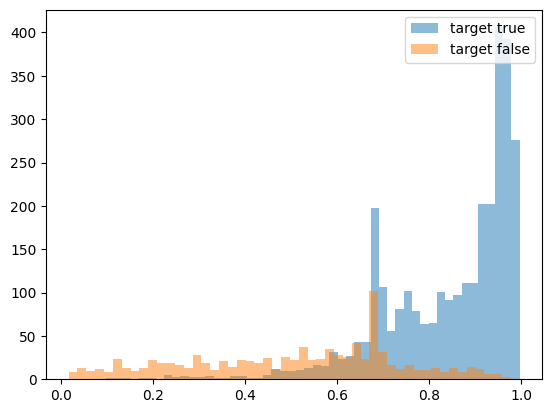

In [132]:
# predictions test set
proba_bow = best_model_xgb_bow.predict_proba(X_test_counts_df)
test_raw_df['prediction_bow'] = proba_bow[:, 1]  # let's get the positive class probability

# plot the predictions
plt.hist(test_raw_df.loc[test_raw_df['Positive'] == 1, 'prediction_bow'], bins=50, alpha=0.5, label='target true')
plt.hist(test_raw_df.loc[test_raw_df['Positive'] == 0, 'prediction_bow'], bins=50, alpha=0.5, label='target false')
plt.legend(loc='upper right')
plt.show()

yaxis = frequency

the x axis the probability of it being positive

### boosted decision tree wiht Word2vec

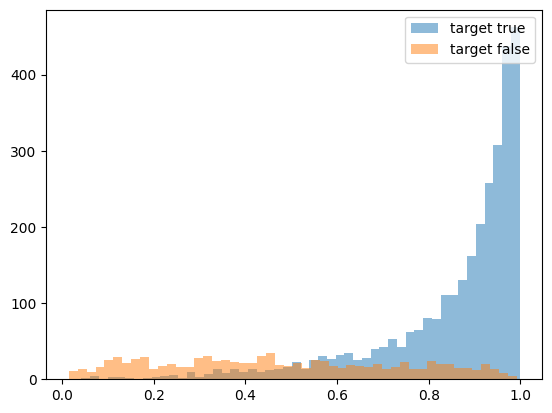

In [133]:
# we do the same for this
# predictions test set
proba_word2vec = best_model_xgb_word2vec.predict_proba(document_vectors_test_np)
test_raw_df['prediction_word2vec'] = proba_word2vec[:, 1]

# Plot the predictions
plt.hist(test_raw_df.loc[test_raw_df['Positive'] == 1, 'prediction_word2vec'], bins=50, alpha=0.5, label='target true')
plt.hist(test_raw_df.loc[test_raw_df['Positive'] == 0, 'prediction_word2vec'], bins=50, alpha=0.5, label='target false')
plt.legend(loc='upper right')
plt.show()

### feed-forward neural network bow


125/125 [==============================] - 0s 2ms/step


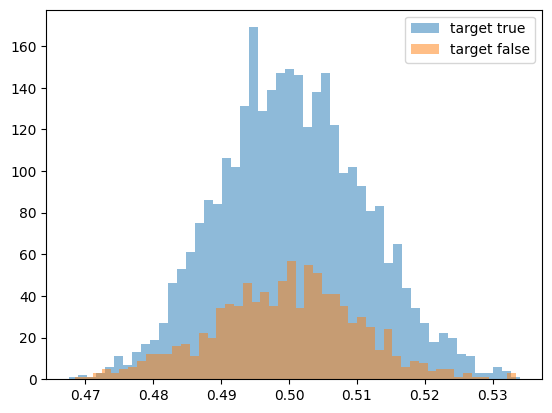

In [137]:
proba_nnet_bow = best_model_nnet_bow.predict(X_test_counts_df)
test_raw_df['prediction_nnet_bow'] = proba_nnet_bow[:, 0] # we use 0 here because theres only the one column of decimal predictions

plt.hist(test_raw_df.loc[test_raw_df['Positive'] == 1, 'prediction_nnet_bow'], bins=50, alpha=0.5, label='target true')
plt.hist(test_raw_df.loc[test_raw_df['Positive'] == 0, 'prediction_nnet_bow'], bins=50, alpha=0.5, label='target false')
plt.legend(loc='upper right')
plt.show()


### feed forward neural netowrk word2vec

125/125 [==============================] - 0s 3ms/step


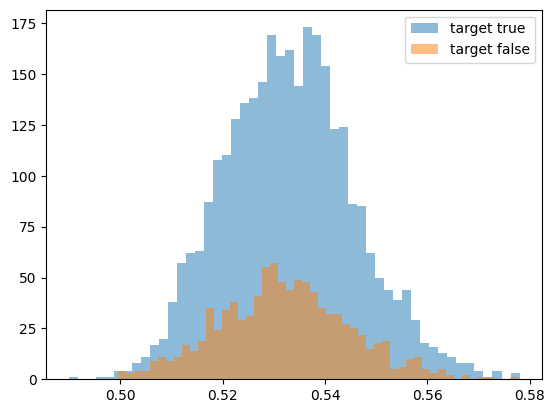

In [136]:
proba_nnet_word2vec = best_model_nnet_word2vec.predict(document_vectors_test_np)
test_raw_df['prediction_nnet_word2vec'] = proba_nnet_word2vec[:, 0]

plt.hist(test_raw_df.loc[test_raw_df['Positive'] == 1, 'prediction_nnet_word2vec'], bins=50, alpha=0.5, label='target true')
plt.hist(test_raw_df.loc[test_raw_df['Positive'] == 0, 'prediction_nnet_word2vec'], bins=50, alpha=0.5, label='target false')
plt.legend(loc='upper right')
plt.show()
